# Resummino example

In [1]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
import hepi.util as util
import matplotlib.pyplot as plt
import hepi.resummino as rs
rs.set_path("~/git/resummino_release/")
print (rs.get_path())

0.1.10.0+dirty
~/git/resummino_release/


## aNNLO+NNLL for weakino pair, slepton pair, Z'/W'->leptons,

skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipRunning: 15 jobs
CPU times: user 6.91 s, sys: 1.24 s, total: 8.16 s
Wall time: 8.66 s


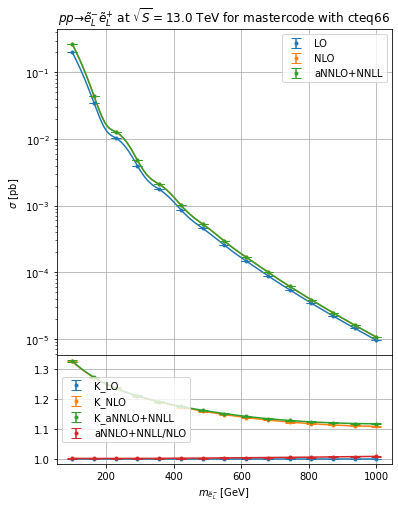

In [2]:
%%time
params = [
    "mastercode_with_gm2.in",
]
pss = [    
      (1000011,-1000011),
     ]

for pa,pb in pss:
    for param in params:
        i = hepi.Input(hepi.Order.aNNLO_PLUS_NNLL,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.)
        #i = hepi.Input(hepi.Order.LO,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.)
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(100,1000,7+8))
        rs_dl = rs.run(li,skip=True)
        
        _,axs = hepi.init_double_plot()
        hepi.mass_plot(rs_dl,["LO","NLO","aNNLO_PLUS_NNLL"],pa,axes=axs[0],tight=False)
        hepi.mass_plot(rs_dl,["K_LO","K_NLO","K_aNNLO_PLUS_NNLL","aNNLO_PLUS_NNLL_OVER_NLO"],pa, yaxis=None, axes=axs[1],logy=False,tight=False)
        hepi.title(axs[0],li[0],scenario="mastercode")

## NLO+NLL for squark/gluino+weakino

skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipRunning: 15 jobs
CPU times: user 5.01 s, sys: 353 ms, total: 5.36 s
Wall time: 5.8 s


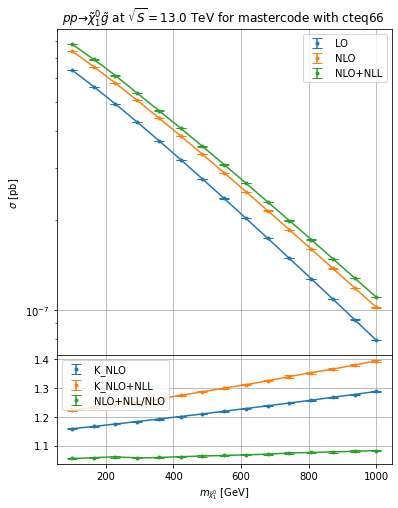

In [3]:
%%time
params = [
    "mastercode_with_gm2.in",
]
pss = [    
      (1000022,1000021),
     ]
for pa,pb in pss:
    for param in params:
        i = hepi.Input(hepi.Order.NLO_PLUS_NLL,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.)
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(100,1000,7+8))
        rs_dl = rs.run(li,skip=True)
        
        _,axs = hepi.init_double_plot()
        hepi.mass_plot(rs_dl,["LO","NLO","NLO_PLUS_NLL"],pa, axes=axs[0],tight=False)
        hepi.mass_plot(rs_dl,["K_NLO","K_NLO_PLUS_NLL","NLO_PLUS_NLL_OVER_NLO"],pa,yaxis=None, axes=axs[1],logy=False,tight=False)
        hepi.title(axs[0],li[0],scenario="mastercode")